<a href="https://colab.research.google.com/github/uldo1/feedmetest/blob/master/faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/datasets/davilsena/ckdataset 

In [ ]:
filename= '/content/drive/MyDrive/datasets/ckextended.csv'

data = pd.read_csv(filename) 
#testing to see if data is there and loaded

data.head()



,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


(2304,)
48
(920, 48, 48)


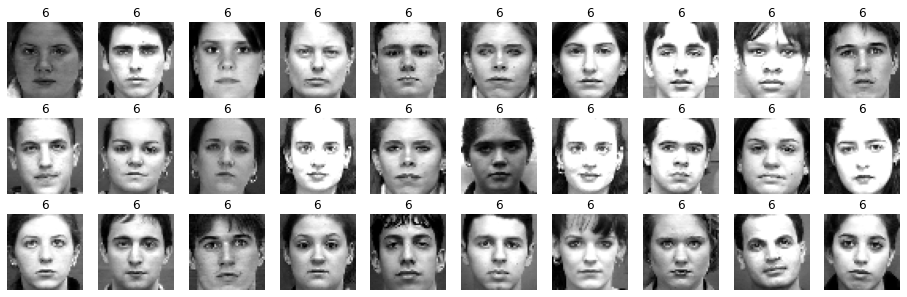

In [ ]:
#need to preprocess the pixels
#makes a new column named images from the pixels column by splitting the string with pixel values into an array, then reshapes the array into size 48 by 48 with float values 


train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)
#8-bit unsigned integer ( 0 to 255 )

print(train_pixels[0].shape)

qtd_pixels = len(train_pixels[0])

qtd_data = data.shape[0]
img_dim = int(qtd_pixels**0.5)
print(img_dim)

pixels = train_pixels.reshape((qtd_data, img_dim, img_dim))
print(pixels.shape)

plt.figure(figsize=(16,5))

for i in range(30):
    img = np.squeeze(pixels[i])
    plt.subplot(3,10,i+1)
    plt.imshow(img, cmap="gray")
    plt.title(data.emotion[i])
    plt.axis('off')
plt.show()


In [ ]:
pixels = pixels.astype("float32") / 255
pixels = pixels.reshape(pixels.shape[0], pixels.shape[1], pixels.shape[2],1)
print(pixels.shape)

print(data.emotion[0])
num_classes=8
labels = to_categorical(data[['emotion']], num_classes) # making into binary class matrices



X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=3)

print(X_train[0].shape)
print(y_train.shape)




(920, 48, 48, 1)
6
(48, 48, 1)
(736, 8)


In [ ]:
input_shape = X_train[0].shape
#2 layers with 16,32,64 and dense 64

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Convolution2D (16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 3200)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

In [ ]:
batch_size = 32
epochs = 20 # smaller batch size and 20 epoch

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
 
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
19/19 [==============================] - 2s 66ms/step - loss: 1.4490 - accuracy: 0.6190 - val_loss: 1.4005 - val_accuracy: 0.6216
Epoch 2/20
19/19 [==============================] - 1s 60ms/step - loss: 1.2816 - accuracy: 0.6548 - val_loss: 1.3268 - val_accuracy: 0.6216
Epoch 3/20
19/19 [==============================] - 1s 61ms/step - loss: 1.1960 - accuracy: 0.6548 - val_loss: 1.2474 - val_accuracy: 0.6216
Epoch 4/20
19/19 [==============================] - 1s 77ms/step - loss: 1.0284 - accuracy: 0.6820 - val_loss: 0.9864 - val_accuracy: 0.7027
Epoch 5/20
19/19 [==============================] - 2s 100ms/step - loss: 0.8634 - accuracy: 0.7517 - val_loss: 0.8256 - val_accuracy: 0.7905
Epoch 6/20
19/19 [==============================] - 2s 107ms/step - loss: 0.6728 - accuracy: 0.8095 - val_loss: 0.7234 - val_accuracy: 0.7838
Epoch 7/20
19/19 [==============================] - 1s 63ms/step - loss: 0.6015 - accuracy: 0.8299 - val_loss: 0.6521 - val_accuracy: 0.8108
Epoch 8/20


In [ ]:
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

6/6 [==============================] - 0s 16ms/step - loss: 0.3778 - accuracy: 0.8804
Test loss: 0.3777899444103241
Test accuracy: 0.8804348111152649


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

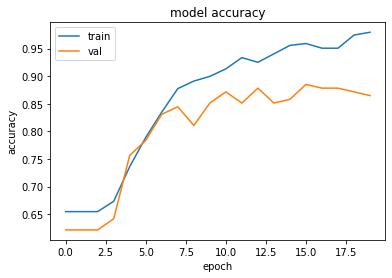

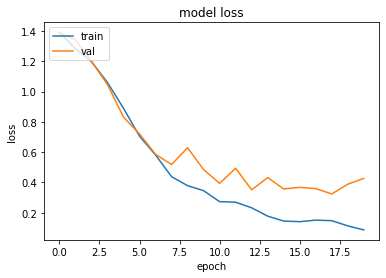

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test)
cf_matrix= metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cf_matrix

6/6 [==============================] - 2s 139ms/step


array([[  5,   0,   0,   0,   0,   0,   4,   0],
       [  2,  11,   0,   1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   4,   0],
       [  0,   0,   1,  17,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,   0,   0,   0,  17,   0,   0],
       [  1,   0,   0,   0,   0,   0, 114,   1],
       [  0,   0,   0,   0,   0,   0,   1,   1]])